<a href="https://colab.research.google.com/github/alexandre-ferreira-1986/DataScience/blob/main/01_Analisando_os_Dados_do_Airbnb_LISBOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="40%" src="https://github.com/alexandre-ferreira-1986/DataScience/blob/main/Images/Logo_04_02_menor.jpg?raw=true">

**Blog: [ThinkingData](https://www.thinkingdata.com.br)**

##### **Projeto do DSNP 3.0**
*Template by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *LISBOA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

A missão do Airbnb se fundamenta na ideia de que as pessoas são essencialmente boas e que uma comunidade é um lugar onde você possa se sentir em casa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade LISBOA, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

**Importante**: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-07-10/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, o arquivo original foi inserido no GITHUB e pode ser encontrado [aqui](https://github.com/alexandre-ferreira-1986/DataScience/blob/main/data/airbnb_listings.csv).


In [ ]:
# Importação de Pacotes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# Importação do arquivo "listings.csv" para um DataFrame

df = pd.read_csv("https://raw.githubusercontent.com/alexandre-ferreira-1986/DataScience/main/data/airbnb_listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

`Descrição dos dados importados`

* `id` - identificador único que identifica o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número único de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião. Normalmente o primeiro nome
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido (lugar inteiro, quarto privado....)
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.32,1,83
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,3,114,2019-11-08,1.30,1,305
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,50,3,328,2019-10-29,2.77,1,143
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,53,2,274,2020-11-26,2.74,1,303
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1114,2,55,2020-03-11,0.84,1,349


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

A compreensão inicial dos dados é essencial, para checar o tamanho e quais tipos de dados estamos lidando.
Para isso, serão identificados:
* A quantidade de  linhas
* A quantidade de colunas
* O tipo de cada dado importado

In [ ]:
# identificação do volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n\n".format(df.shape[1]))

# verificação dos tipos de entradas do dataset
print("Tipos de dados:")
display(df.dtypes)

Entradas:	 19458
Variáveis:	 16


Tipos de dados:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Após identificar o tamanho do dataset e suas variáveis, começamos a conhecer um pouco melhor com o que estamos lidando.
Agora se faz necessário saber quantos dados estão ausentes, ou seja, quantas informações estão faltando no dataset e que podem acabar atrapalhando as análises.

Os dados abaixo trazem as seguintes informações:
* Não há nenhuma coluna que esteja faltando valores na sua totalidade;
* As colunas com mais dados ausentes são: *reviews_per_month* e *last_review*, com 18,36% aproximadamente.
* Depois destas duas os valores ausentes são menores que 0,1%, aproximadamente.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.183626
last_review                       0.183626
host_name                         0.001079
name                              0.000514
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

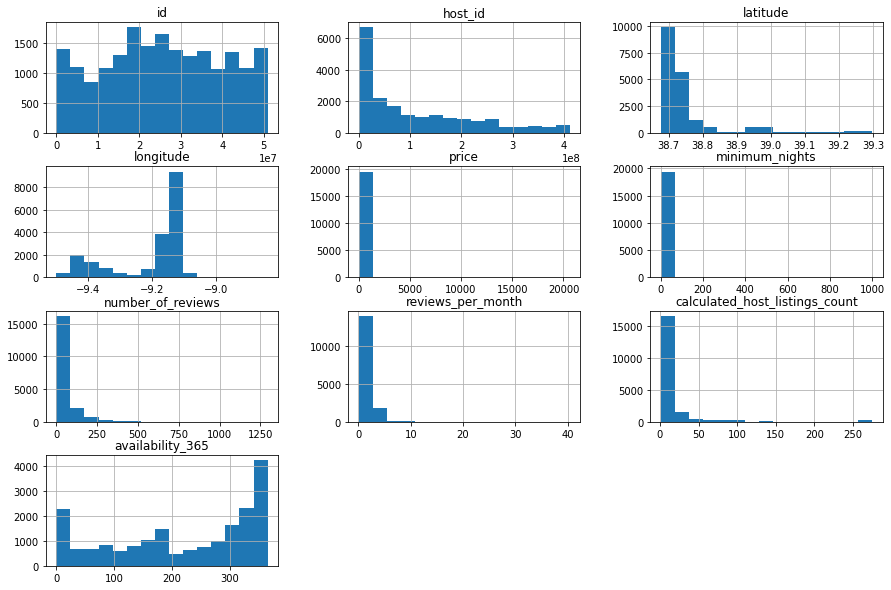

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
A partir dos histogramas acima, é possível verificar indícios de *outliers*. Fato observado, por exemplo, nas variáveis:
* `price`
* `minimum_nights`
*  `calculated_host_listings_count`

Os valores não seguem uma distribuição uniforme.

In [ ]:
# ver a média da coluna `price``
df.price.mean()

108.29602220166512

In [ ]:
# Conferir os dados estatísticos das 3 variáveis acima.

df[['price', 'minimum_nights', 'calculated_host_listings_count']].describe()

,price,minimum_nights,calculated_host_listings_count
count,19458.000000,19458.000000,19458.000000
mean,108.296022,3.850396,14.212560
std,281.433465,16.737444,36.725234
min,0.000000,1.000000,1.000000
25%,50.000000,1.000000,1.000000
50%,72.000000,2.000000,4.000000
75%,110.000000,3.000000,11.000000
max,20628.000000,1000.000000,275.000000


**Observações:**

Nos 3 é possível observar uma discrepância grande nos dados distribuídos até 75% e o Máximo. Fortalecendo a tese de que há *outliers* a serem tratados.

### Analisando: minimum_nights

Qualquer valor mínimo acima de 30 dias, será considerado fora do padrão. Já que o Airbnb não há tanto sentido uma quantidade alta de diárias mínimas.

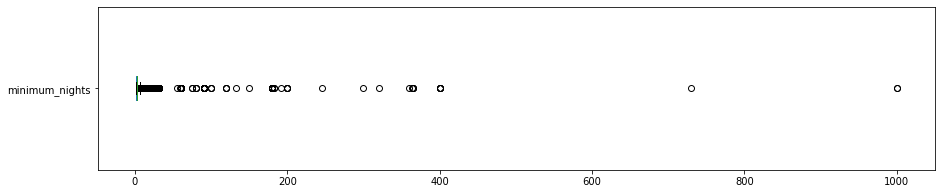

minimum_nights: valores acima de 30 dias:
95 entradas
0.4882%


In [ ]:
# Plotando o Boxplot

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Checando a quantidade de valores acima de 30 dias

print("minimum_nights: valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Analisando: price

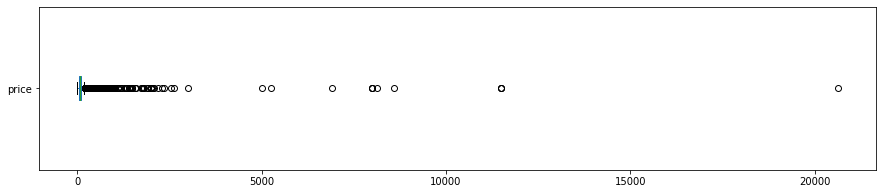


price: valores acima de 500
289 entradas
1.4853%


In [ ]:
# Boxplot de price

df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Checar valores acima de 500
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

### Analisando: calculated_host_listings_count

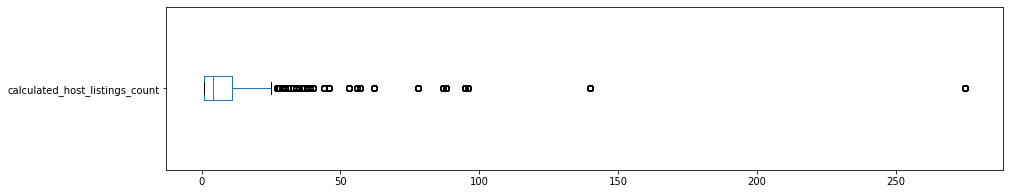


price: valores acima de 140
275 entradas
1.4133%


In [ ]:
# Boxplot de calculated_host_listings_count

df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Checar valores acima de 140
print("\nprice: valores acima de 140")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 140])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 140]) / df.shape[0])*100))

### Histogramas sem os Outliers

Conforme os valores observados acima, agora será feita a análise retirando os *outliers*

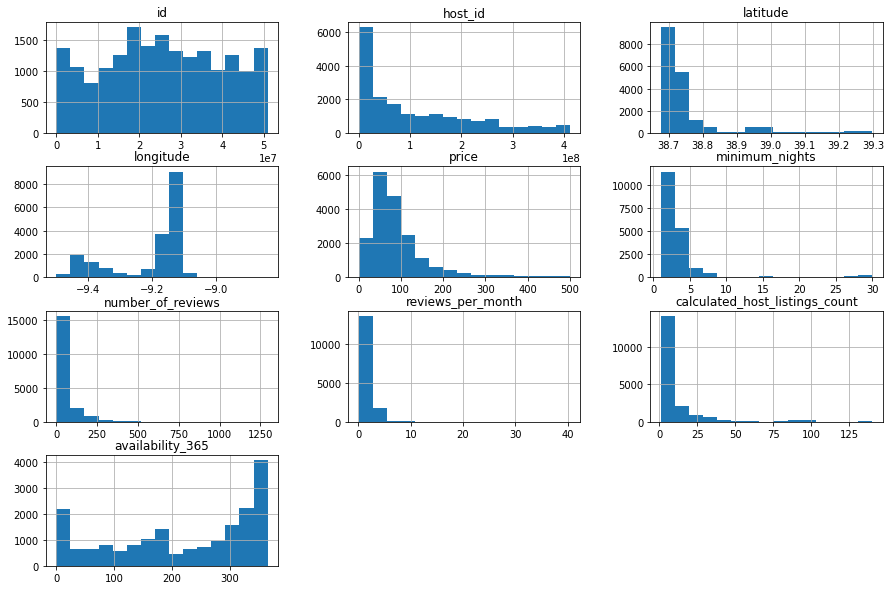

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 140].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### Analise do Dataframe após a limpeza

In [ ]:
print("Antes da limpeza: ", df.shape)
print("Após o tratamento: ", df_clean.shape)

Antes da limpeza:  (19458, 16)
Após o tratamento:  (18800, 16)


--------------------------
* **Com uma perda baixa dos dados, já foi possível fazer uma boa limpeza dos dados.** 
--------------------------

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.039330,-0.125044,-0.131101,0.015767,0.062227
minimum_nights,-0.039330,1.000000,-0.068578,-0.098685,-0.041060,-0.066185
number_of_reviews,-0.125044,-0.068578,1.000000,0.740764,-0.090878,-0.006370
reviews_per_month,-0.131101,-0.098685,0.740764,1.000000,-0.057655,0.023847
calculated_host_listings_count,0.015767,-0.041060,-0.090878,-0.057655,1.000000,0.021164
availability_365,0.062227,-0.066185,-0.006370,0.023847,0.021164,1.000000


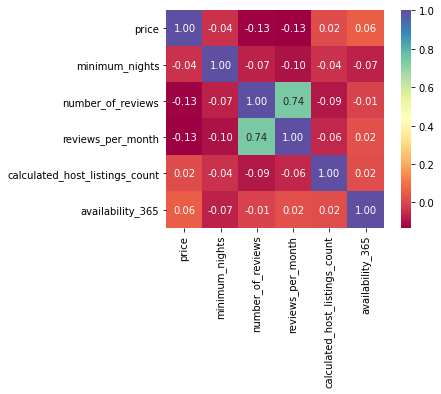

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='Spectral', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Ao analisar a variável *room_type* será possível extrair as inforamções do tipo de imóvel anunciado. Dentre as opções podemos encontrar espaços inteiros, quarto privado, quarto compartilhado e outros.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13893
Private room        4205
Hotel room           360
Shared room          342
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.738989
Private room       0.223670
Hotel room         0.019149
Shared room        0.018191
Name: room_type, dtype: float64

**

---
**Logo podemos observar que cerca de 73% dos anúncios se referem a casa ou apartamento inteiro**

----

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Alguber                                     480.000000
Ota                                         465.000000
Cardosas                                    298.000000
Vermelha                                    276.500000
Aveiras de Baixo                            274.500000
Vale do Paraso                              230.000000
Carvoeira e Carmes                          191.250000
Azueira e Sobral da Abelheira               185.000000
Santa Brbara                                167.916667
Ribamar                                     162.470588
So Pedro da Cadeira                         159.611111
Maxial e Monte Redondo                      158.000000
Turcifal                                    154.333333
Arranh                                      150.000000
Colares                                     145.576602
Alhandra, So Joo dos Montes e Calhandriz    141.333333
Bucelas                                     138.000000
Castanheira do Ribatejo e Cachoeiras        137.000

### Será que estas são as localidades mais significantes realmente?

Caso você não conheça tanto a localidade, é necessário uma análise para checar se estes valores condizem com a realidade.

Para isso, vamos checar quantos anúncios tem em cada uma destas 10 localidades.

Caso a quantidade de anúncio seja muito baixa, os valores podem estar distorcidos.

In [ ]:
# Quantidade de anúncios nas localidades de maior preço
for i in (df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20].index):
  print("Em {} :".format(i), df_clean[df_clean.neighbourhood == i].shape[0])

Em Alguber : 1
Em Ota : 1
Em Cardosas : 1
Em Vermelha : 2
Em Aveiras de Baixo : 2
Em Vale do Paraso : 1
Em Carvoeira e Carmes : 4
Em Azueira e Sobral da Abelheira : 3
Em Santa Brbara : 12
Em Ribamar : 17
Em So Pedro da Cadeira : 18
Em Maxial e Monte Redondo : 4
Em Turcifal : 6
Em Arranh : 2
Em Colares : 359
Em Alhandra, So Joo dos Montes e Calhandriz : 12
Em Bucelas : 8
Em Castanheira do Ribatejo e Cachoeiras : 2
Em Vilar : 13
Em Igreja Nova e Cheleiros : 21


---

Ao analisar a quantidade de anúncios, podemos observar que a quantidade de anúncios nas localidades com maior preço, são muito baixas.

Vamos analisar as localidades com mais anúncios para comprovar tal fato:

In [ ]:
# Localidades com mais anúncios
df_clean.neighbourhood.value_counts()[:15]

Santa Maria Maior                                    3029
Misericrdia                                          2250
Arroios                                              1722
Cascais e Estoril                                    1215
Santo Antnio                                         1071
So Vicente                                           1034
Estrela                                               758
Ericeira                                              668
Avenidas Novas                                        666
S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim     515
Penha de Frana                                        403
Colares                                               359
Carcavelos e Parede                                   310
Lourinh e Atalaia                                     300
Areeiro                                               294
Name: neighbourhood, dtype: int64

In [ ]:
neighb = []
for i in df_clean.neighbourhood.value_counts()[:15].index:
  neighb.append(i)

neighb



['Santa Maria Maior',
 'Misericrdia',
 'Arroios',
 'Cascais e Estoril',
 'Santo Antnio',
 'So Vicente',
 'Estrela',
 'Ericeira',
 'Avenidas Novas',
 'S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim',
 'Penha de Frana',
 'Colares',
 'Carcavelos e Parede',
 'Lourinh e Atalaia',
 'Areeiro']

--- 

Podemos observar que apenas **colares** aparece na lista inicial. Talvez, fazer uma lista com os preços das localidades mais importantes seja bem mais expressivo.

In [ ]:
list_mean = []
for i in neighb:
#  print(df_clean.neighbourhood.groupby(i).price.mean().sort_values(ascending=False))
  mean = round(df_clean[df_clean.neighbourhood == i].groupby('neighbourhood').price.mean()[0], 2)
  list_mean.append(mean)
  df_neighb = pd.DataFrame(list(zip(neighb,list_mean)), columns = ['Neighborhood','Mean'])



In [ ]:
df_neighb.set_index('Neighborhood', inplace=True)

In [ ]:
df_neighb.sort_values(by = 'Mean', ascending=False)

,Mean
Neighborhood,
Colares,145.58
Cascais e Estoril,128.72
Lourinh e Atalaia,121.23
Ericeira,113.56
"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",105.25
Santa Maria Maior,93.01
Misericrdia,92.82
Santo Antnio,90.82
Carcavelos e Parede,86.20


---
Agora podemos dizer que temos dados mais significativos. Entre os 15 bairros com mais anúncios está é a média de preços.
Para comprovar os dados, vamos checar, se a média de preços geral realmente está em torno da média destes anúncios mais significativos.

In [ ]:
df_clean.price.describe()

count    18800.000000
mean        91.601064
std         73.465466
min          0.000000
25%         49.000000
50%         71.000000
75%        108.000000
max        500.000000
Name: price, dtype: float64

---
A média de 91,6 realmente representa bem a média dos anúncios mais significativos.

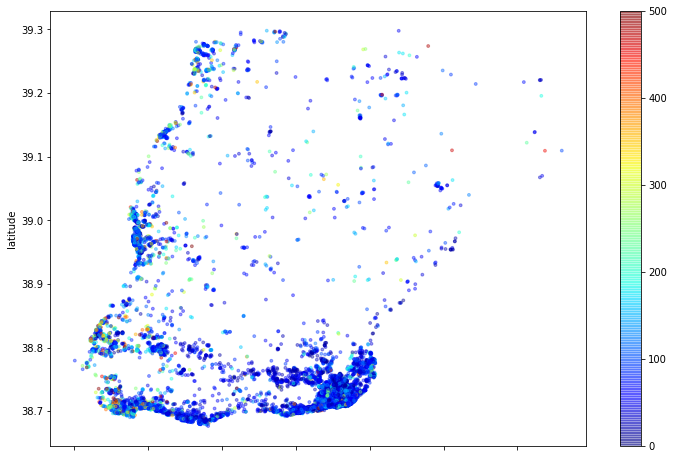

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

3.098031914893617

In [ ]:
# Antes do tratamento a média era:
df.minimum_nights.mean()

3.8503957241237536

É possível observar um ajuste de quase 1 dia na média de noites mínimas.

## Conclusões


A partir da análise acima é possível trazer algumas observações:



1.   Os dados importados possuíam uma **percentagem baixa de dados faltantes**. A coluna com mais dados ausentes era de 18%. Por vezes estes números costumam ser mais expressivos e necessitam de mais tratamento.
2.   A **identificação inicial de *outliers* permitiu um melhor ajute de valores** a realidade. Os valores das variáveis foram testados, até que a perda de dados fosse de aproximadamente de **1%** apenas. Assim, não seriam excluídos muitos dados.
3.   A **matriz de correlação** não trouxe uma correlação forte entre os dados que estavam sendo trabalhados. A maior correlação observada foi entre "number of reviews" e "reviews per month". O que tem bastante lógica.
4.   Ao observar os maiores **valores anunciados por cada bairro**, foi possível observar uma **grande discrepância nos valores**. Então, foi possível observar que estes bairros possuíam poucos anúncios, então sua média era puxada para cima.
5.   Foi realizada uma **seleção dos bairros com mais anúncios**, e ao observar a média dos mesmos, foi possível trazer **valores mais próximos da realidade da amostra**.

---

Certamente foi possível observar a importância da limpeza dos dados e principalmente a necessidade de compreender os números extraídos.

Se simplesmente não fosse feita uma análise dos maiores valores de anúncio, seria possível acreditar que bairros sem grande expressão de anúncios poderiam ser os mais caros.



<img alt="Colaboratory logo" width="40%" src="https://github.com/alexandre-ferreira-1986/DataScience/blob/main/Images/Logo_04_02_menor.jpg?raw=true">

by [Alexandre Ferreira](https://www.linkedin.com/in/alexandre-dos-santos-ferreira-2884651a4/)